# GNN Explain by GRAD 

This notebook is designed to visualize the results of the GNN Explainer.
- networkx: https://www.cxybb.com/article/DD18203614685/99285646

In [1]:
import os
import re
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
os.getcwd()
graph_type = 'doc_word_sen' #'context_centernode'

In [2]:
# 获取labelmap
label_map = {0:'非投诉会话',1:'客户感受差',2:'投诉',3:'3 推诿',4:'未解决问题',5:'四到类',6:'6 人身伤害',10:'10 重复提问',99:'词',-1:'未知标签'}

In [3]:
# label_map_pred = {0: '未知标签', 1: '非投诉会话', 2: '客户感受差', 3: '投诉', 4: '词', 5: '未解决问题', 6: '四到类'}

In [4]:
nodeid2txt = {}
path = r'E:\0_code\gnn-model-explainer-master_hql\data'
nodeid2txt_path = os.path.join(path,graph_type,'nodeid2txt.txt')
with open(nodeid2txt_path,'r',encoding='utf-8') as fr:
    lines = fr.readlines()
    for line in lines[1:]:
        nodeidx,txt = line.strip('\n').split('\t')
        nodeid2txt[nodeidx]=txt

In [6]:
# 获取nodeid2label
feature_labels_path = os.path.join(path,graph_type,'feature_label.csv')
df_feature_labels = pd.read_csv(feature_labels_path,sep='\t')
nodeid = df_feature_labels['nodeid']
labels = df_feature_labels['label']
nodeid2label = dict(zip(nodeid,labels))
nodeid2label

{0: 99,
 1: 99,
 2: 99,
 3: 99,
 4: 99,
 5: 99,
 6: 99,
 7: 99,
 8: 99,
 9: 99,
 10: 99,
 11: 99,
 12: 99,
 13: 99,
 14: 99,
 15: 99,
 16: 99,
 17: 99,
 18: 99,
 19: 99,
 20: 99,
 21: 99,
 22: 99,
 23: 99,
 24: 99,
 25: 99,
 26: 99,
 27: 99,
 28: 99,
 29: 99,
 30: 99,
 31: 99,
 32: 99,
 33: 99,
 34: 99,
 35: 99,
 36: 99,
 37: 99,
 38: 99,
 39: 99,
 40: 99,
 41: 99,
 42: 99,
 43: 99,
 44: 99,
 45: 99,
 46: 99,
 47: 99,
 48: 99,
 49: 99,
 50: 99,
 51: 99,
 52: 99,
 53: 99,
 54: 99,
 55: 99,
 56: 99,
 57: 99,
 58: 99,
 59: 99,
 60: 99,
 61: 99,
 62: 99,
 63: 99,
 64: 99,
 65: 99,
 66: 99,
 67: 99,
 68: 99,
 69: 99,
 70: 99,
 71: 99,
 72: 99,
 73: 99,
 74: 99,
 75: 99,
 76: 99,
 77: 99,
 78: 99,
 79: 99,
 80: 99,
 81: 99,
 82: 99,
 83: 99,
 84: 99,
 85: 99,
 86: 99,
 87: 99,
 88: 99,
 89: 99,
 90: 99,
 91: 99,
 92: 99,
 93: 99,
 94: 99,
 95: 99,
 96: 99,
 97: 99,
 98: 99,
 99: 99,
 100: 99,
 101: 99,
 102: 99,
 103: 99,
 104: 99,
 105: 99,
 106: 99,
 107: 99,
 108: 99,
 109: 99,
 110: 99,


In [7]:
# GCN 分类结果
gcn_pred_path = os.path.join(path,graph_type,'pred_labels_all.txt')
nodeid2gcnpred = dict()
with open(gcn_pred_path,'r',encoding='utf-8') as fr_pred_labels_all:
    lines = fr_pred_labels_all.readlines()
    num_lines = len(lines)
    for i in range(num_lines):
        pred,label = lines[i].strip('\n').split('\t')
        nodeid2gcnpred[i] = int(pred)
# nodeid2gcnpred

Configuring the experiment you want to visualize. These values should match the configuration:

> TODO: Unify configuration of experiments in yaml

In [17]:
label_iidx = '2投诉曝光'
method = 'exp'
logdir = r"E:\0_code\gnn-model-explainer-master_hql"
logdir = os.path.join(logdir,'log\\npy',method,graph_type,str(label_iidx))
expdir = ''
logdir

'E:\\0_code\\gnn-model-explainer-master_hql\\log\\npy\\exp\\doc_word_sen\\2投诉曝光'

In [18]:
# Load the produced masks

In [22]:
dirs = os.listdir(os.path.join(logdir))
dirs

['im_doc_word_sen_base_h512_o256_explain',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_636graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_637graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_638graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_639graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_640graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_641graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_642graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_643graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_644graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_645graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_646graph_idx_-1.npy',
 'masked_adj_im_doc_word_sen_base_h512_o256_explainnode

In [23]:
masks = []
idx = []
neighbors = []
# This would print all the files and directories
for file in dirs:
    if file.split('.')[-1] == 'npy':
        print(file)
        idx.extend(re.findall(r"(\d+)graph",file.split('_')[-3]))
        name_list = file.split('_')
        if name_list[1] == 'adj':
            masks.append(file)
        elif name_list[1] == 'neighbors':
            neighbors.append(file)

masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_636graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_637graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_638graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_639graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_640graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_641graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_642graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_643graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_644graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_645graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_646graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_647graph_idx_-1.npy
masked_adj_im_doc_word_sen_base_h512_o256_explainnode_idx_648gra

In [24]:
def get_node_color_by_gcn_pred(neighbors,nodeidx,nodes):
    ''' 根据节点GCN分类pred，给节点不同的颜色:nodeidx为红色，99-灰色，0-蓝色，1-黄色，2-绿色，4-橙色，'''
    color_map = {99:'thistle',0:'lightsteelblue',1:'gold',2:'yellowgreen',4:'lightsalmon',5:'violet',-1:'silver'}
    neighbors_ = np.load(os.path.join(logdir, expdir, neighbors), allow_pickle=True)
    neighbors_ = [neighbors_[node] for node in nodes] # 对应全局的idx
#     print(type(neighbors_[0]),type(nodeidx))
#     print(neighbors_,nodeidx,nodeidx in neighbors_)
    neighbors_gcnpred = [color_map[int(nodeid2gcnpred[nei])] for nei in neighbors_] #if int(nei)!= int(nodeidx) else 'red' 
    
    return neighbors_gcnpred

In [25]:
def get_neighbors_oriinfo(neighbors,nodes):
    ''' 获取neighbors 的中文  txt_wrap(nodeid2txt[str(nei)],7)'''
    neighbors_ = np.load(os.path.join(logdir, expdir, neighbors), allow_pickle=True)
    if len(neighbors_):
        neighbors_ = [neighbors_[node] for node in nodes]
        neighbors_txts_labels = [[nodeid2txt[str(nei)],label_map[int(nodeid2label[nei])],label_map[int(nodeid2gcnpred[nei])]] for nei in neighbors_]
        return neighbors_txts_labels
    return []

In [26]:
def show_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, mask), allow_pickle=True)
    if ax is None:
        plt.figure()
        plt.imshow(adj);
    else:
        ax.imshow(adj)
    return adj

In [27]:
def filter_adj(adj):
    filt_adj = adj.copy()
    filt_adj[adj<0.8] = 0
    return filt_adj

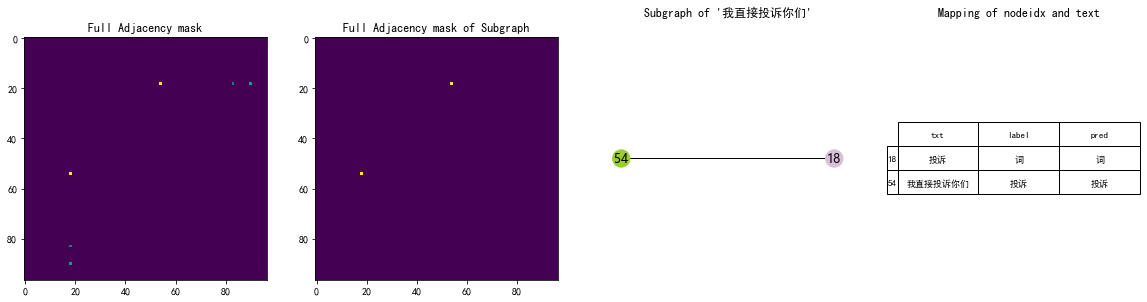

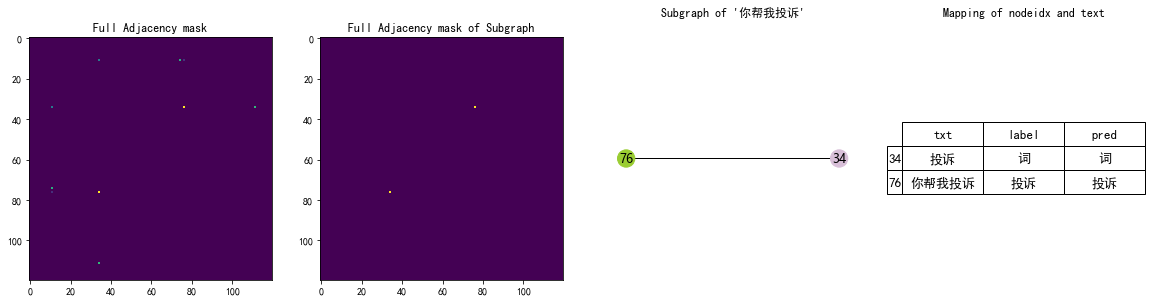

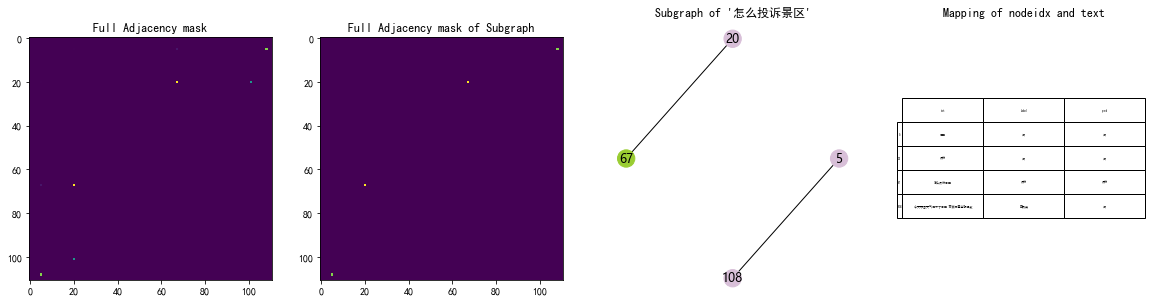

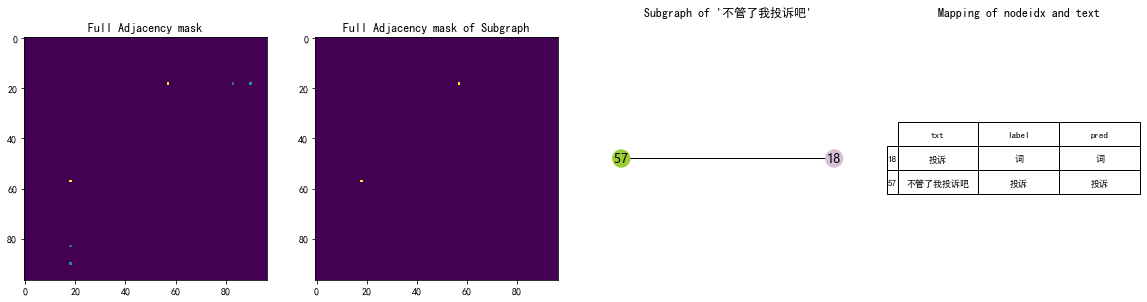

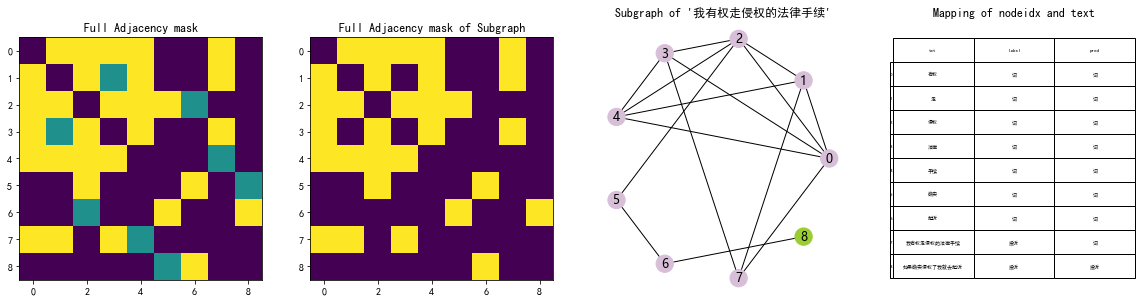

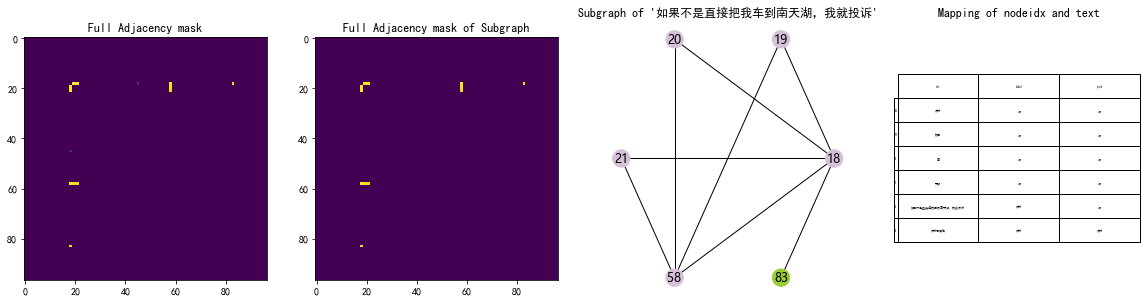

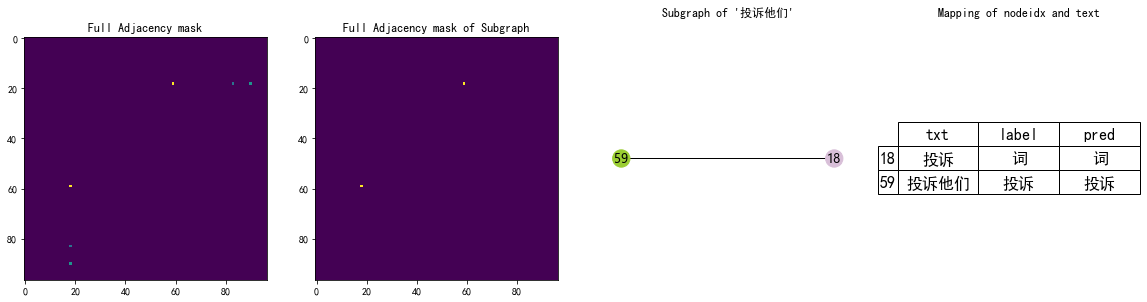

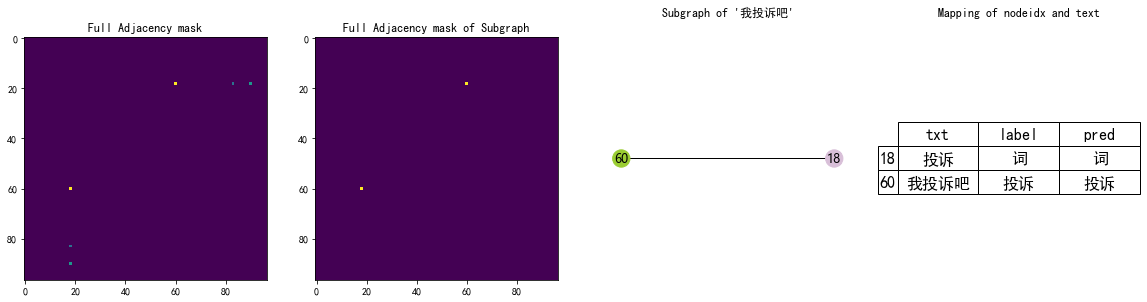

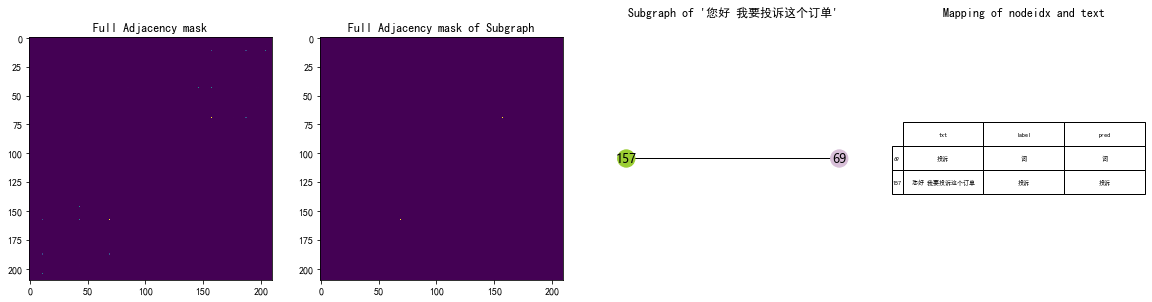

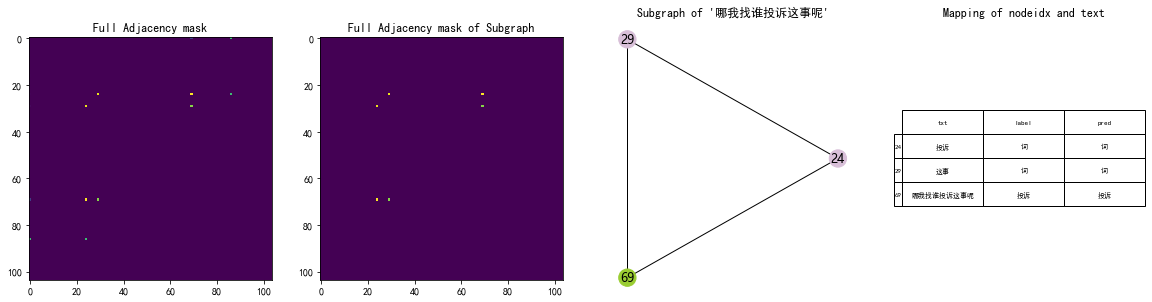

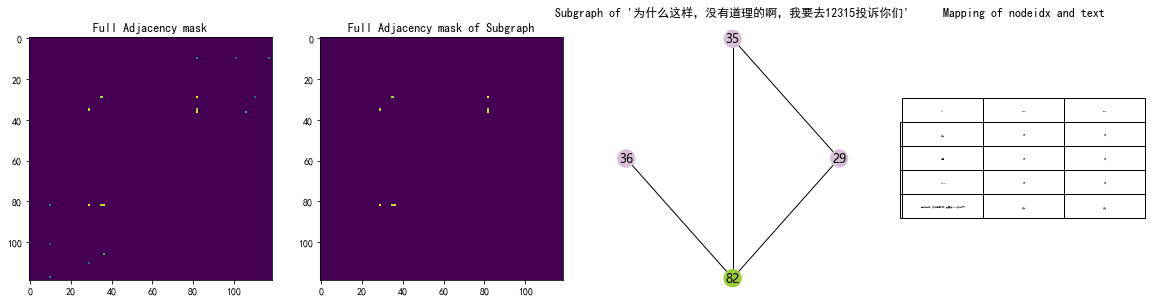

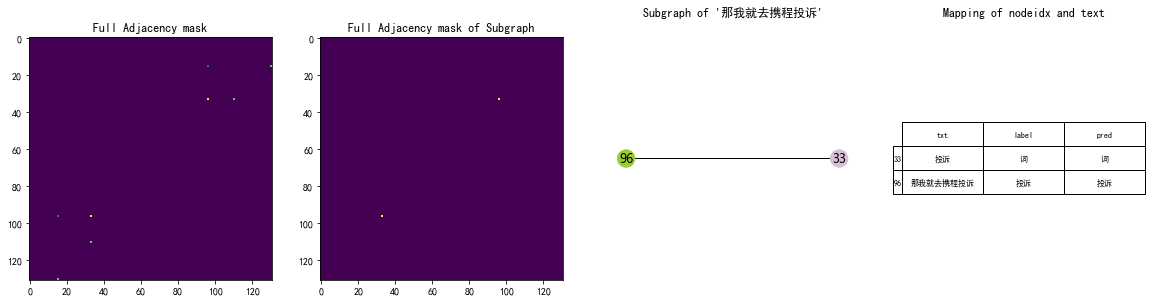

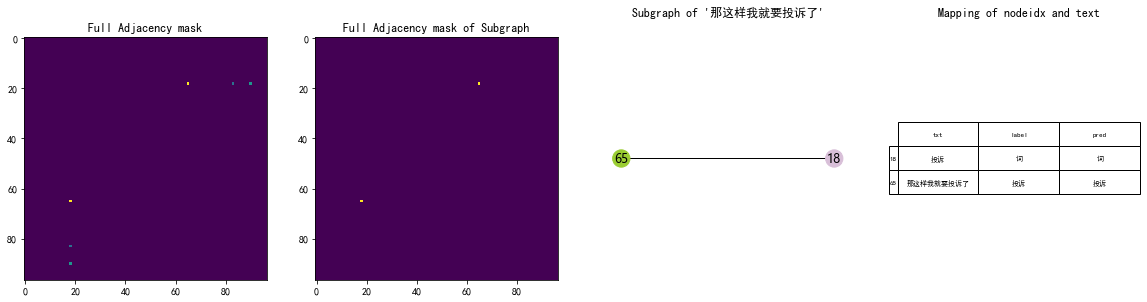

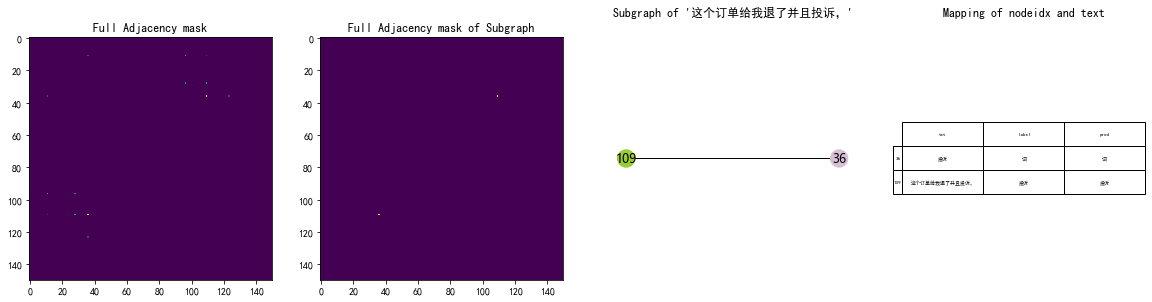

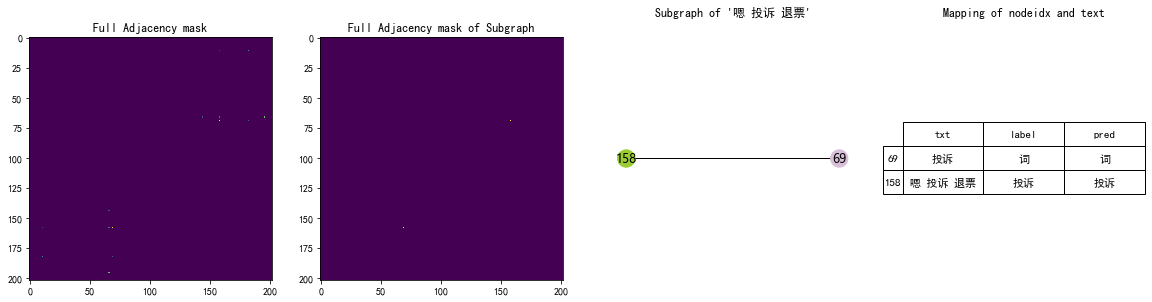

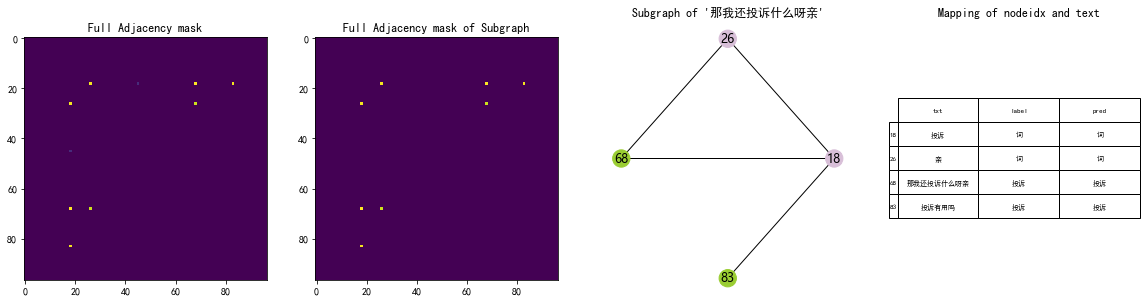

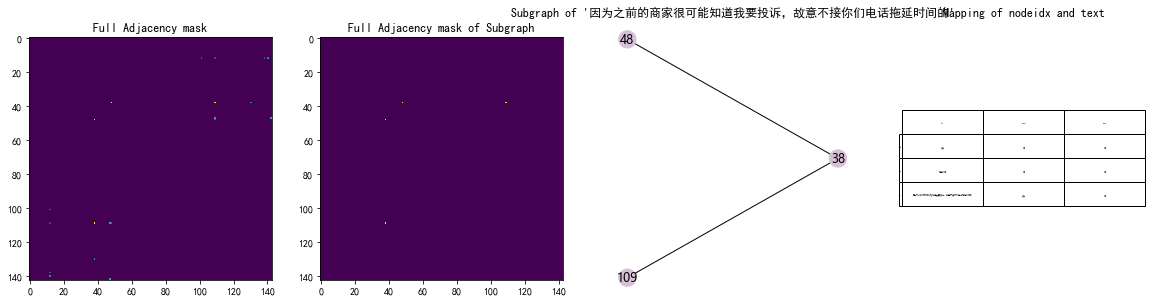

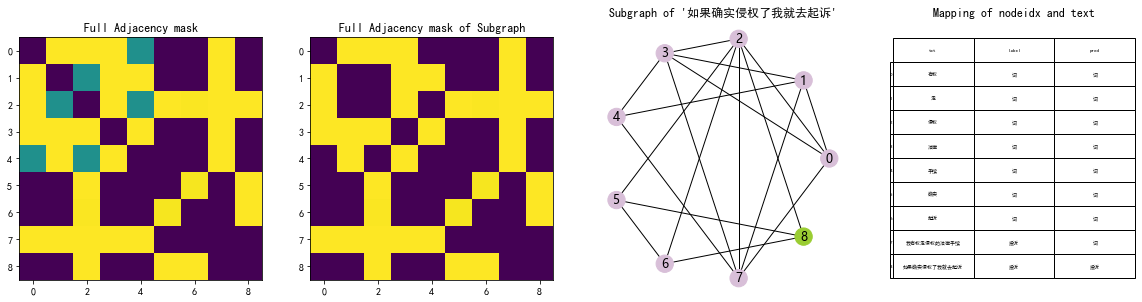

In [29]:
for m,i,neibor in zip(masks,idx,neighbors): 

    fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))
    plt.title(str(m))
    
    # Full adjacency
    ax1.set_title('Full Adjacency mask')
    adj = show_adjacency_full(m, ax=ax1)
    
    # Filtered adjacency
    f = filter_adj(adj)
    ax2.set_title('Full Adjacency mask of Subgraph')
    ax2.imshow(f);
    
    # Plot subgraph
    ax3.set_title(f"Subgraph of '{nodeid2txt[i]}'")
    G = nx.from_numpy_array(f)
    G.remove_nodes_from(list(nx.isolates(G)))
    node_colors = get_node_color_by_gcn_pred(neibor,i,G.nodes)
    nx.draw(G,pos=nx.circular_layout(G),with_labels=True,ax=ax3,node_color=node_colors)
    
    # Plot nodeidx2txt
    ax4.set_title(f"Mapping of nodeidx and text")
    neighbors_txts_labels = get_neighbors_oriinfo(neibor,G.nodes)
    if len(neighbors_txts_labels):
        tab = plt.table(cellText=neighbors_txts_labels, 
                      colLabels=['txt','label','pred'], 
                     rowLabels=[str(n) for n in G.nodes],
                      loc='center', 
                      cellLoc='center',
                      rowLoc='center')
        tab.auto_set_font_size(True)
        tab.set_fontsize(16)
        tab.scale(1,2) 
    plt.axis('off')
    os.makedirs("E:\\0_code\\gnn-model-explainer-master_hql\\log\\subgraph\\grad\\"+graph_type+'\\'+str(label_iidx), exist_ok=True)
#     plt.savefig("E:\\0_code\\gnn-model-explainer-master_hql\\log\\subgraph\\grad\\"+graph_type+'\\'+str(label_iidx)+'\\' + m[:-4] + ".png")